# Hypothesis Testing

We will test two statistical tests:

1. Comparison of total World Cup performance between UEFA and CONMEBOL teams  
2. Correlation between FIFA average ranking and total World Cup performance





## Test 1: UEFA vs CONMEBOL – Total Stage Score

**Objective:**  
Determine whether UEFA teams have performed better than CONMEBOL teams in terms of total World Cup success (`sum_stage_score`).

**Hypotheses:**  
- H₀: UEFA and CONMEBOL teams have equal total stage scores  
- H₁: UEFA teams have higher total stage scores than CONMEBOL teams

**Test Used:** Two-sample Welch’s t-test (unequal variances)


In [5]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the data
ts = pd.read_csv('output/team_stats.csv')

# Select samples
uefa = ts[ts['confed'] == 'UEFA']['sum_stage_score_full']
conm = ts[ts['confed'] == 'CONMEBOL']['sum_stage_score_full']

# Apply Welch's t-test
t_stat, p_val = ttest_ind(uefa, conm, equal_var=False)

print("UEFA vs CONMEBOL (sum_stage_score_full)")
print(f"t = {t_stat:.3f}, p = {p_val:.3f}")



UEFA vs CONMEBOL (sum_stage_score_full)
t = -1.093, p = 0.302


### Boxplot: UEFA vs CONMEBOL Stage Scores

This visualization shows the distribution of total stage scores by confederation.


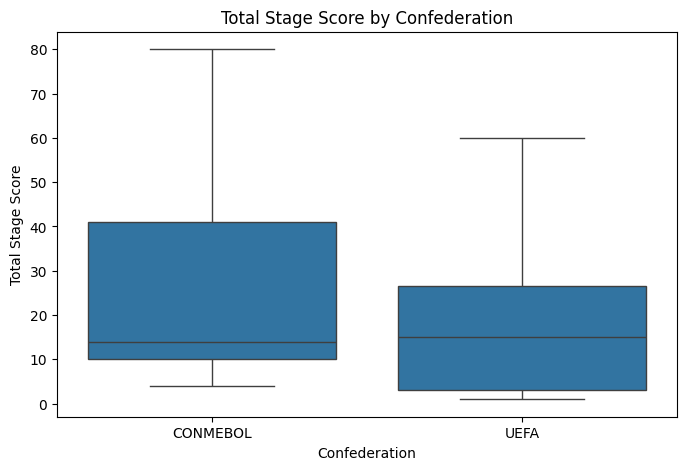

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(data=ts[ts['confed'].isin(['UEFA','CONMEBOL'])], x='confed', y='sum_stage_score_full')
plt.title('Total Stage Score by Confederation')
plt.xlabel('Confederation')
plt.ylabel('Total Stage Score')
plt.show()


**Conclusion:**  
We fail to reject the null hypothesis.  
With a test statistic of **t = –1.093** and a **p-value of 0.302**, there is no statistically significant difference between UEFA and CONMEBOL teams in terms of total stage score.  
This suggests that historically, UEFA teams have not clearly outperformed CONMEBOL teams in cumulative World Cup performance.


## Test 2: Correlation Between FIFA Ranking and Stage Score

**Objective:**  
Evaluate whether a team’s average FIFA ranking correlates with their total World Cup success.

**Hypotheses:**  
- H₀: No monotonic correlation exists between average ranking and total stage score  
- H₁: A monotonic correlation exists

**Test Used:** Spearman rank correlation


In [21]:
from scipy.stats import spearmanr

# NaN içeren satırları temizleyerek test yapmak
cleaned = ts[['sum_stage_score_post94', 'avg_rank']].dropna()

rho, p_corr = spearmanr(cleaned['sum_stage_score_post94'], cleaned['avg_rank'])

print("Spearman correlation: sum_stage_score_post94 vs avg_rank")
print(f"rho = {rho:.3f}, p = {p_corr:.3f}")


Spearman correlation: sum_stage_score_post94 vs avg_rank
rho = -0.832, p = 0.000


### Scatter Plot: Stage Score vs. Average FIFA Ranking

The scatter plot below illustrates the relationship between average FIFA ranking and total World Cup performance.


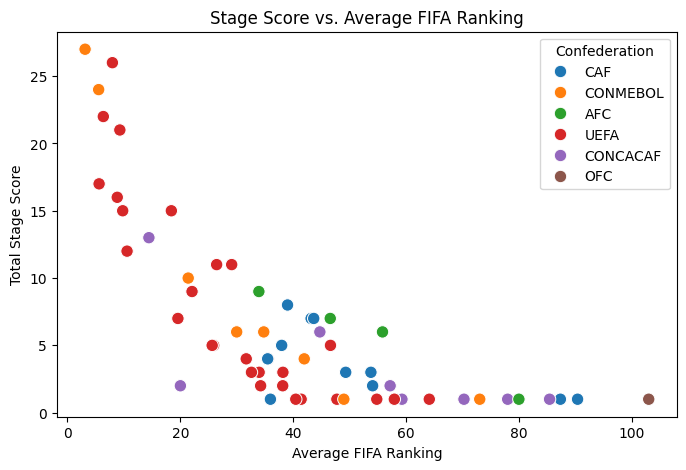

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=ts, x='avg_rank', y='sum_stage_score_post94', hue='confed', s=80)
plt.title('Stage Score vs. Average FIFA Ranking')
plt.xlabel('Average FIFA Ranking')
plt.ylabel('Total Stage Score')
plt.legend(title='Confederation')
plt.show()


**Conclusion:**  
We reject the null hypothesis.  
With a Spearman correlation of **ρ = –0.832** and **p < 0.001**, we observe a **very strong and statistically significant negative correlation** between a team’s average FIFA ranking and their total stage score (post-1994).  
This indicates that teams with consistently better FIFA rankings (lower values) tend to perform better in World Cups held since 1994.
